In [2]:
import pandas as pd

# Read the new Excel file
data = pd.read_excel("Modified_Analysis.xlsx")

# Print the column names to identify the correct one
print(data.columns)


Index(['Timestamp', 'Username', 'Q1. Enter your Name ', 'AgeGroup',
       'Q3.  Specify your gender', 'UsedSites', 'PreferredSite',
       'PreferredChoice', 'TrustPayment', 'QualityProducts', 'ReturnPolicies',
       'ProductInfo', 'OverallTrust', 'DeliverySatisfaction',
       'ProductSatisfaction', 'PackagingSatisfaction', 'OverallExperience',
       'WouldShopAgain', 'RecommendSite', 'Loyalty'],
      dtype='object')


In [3]:
print(data['TrustPayment'])

0      Quite often
1       Completely
2      Quite often
3       Completely
4       Completely
          ...     
150    Quite often
151     Completely
152      Sometimes
153     Completely
154     Completely
Name: TrustPayment, Length: 155, dtype: object


C:\Users\nayan raj\AppData\Local\Temp\ipykernel_15044\103809070.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=count_table, ci=None, palette="pastel", ax=axes[0])


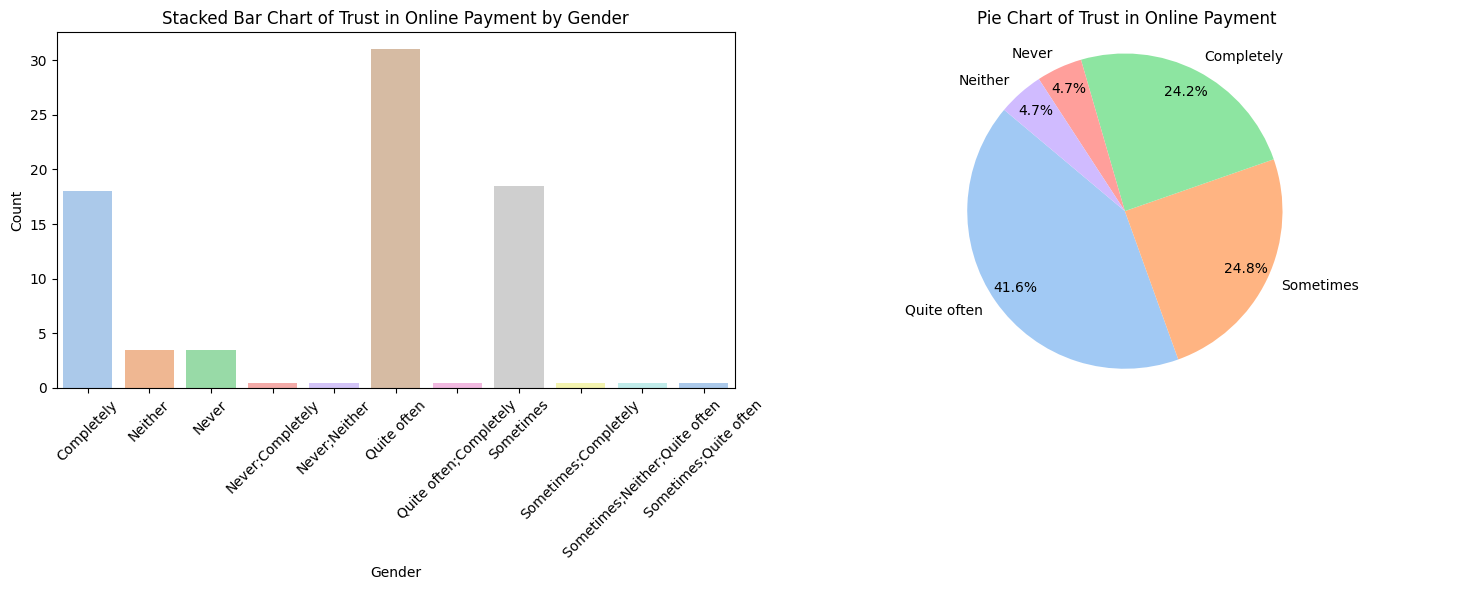

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the new Excel file
data = pd.read_excel("Modified_Analysis.xlsx")

# Correct the column name for gender to match the exact name in the dataset
gender_column = 'Q3.  Specify your gender'
trust_column = 'TrustPayment'

# Create a table of counts
count_table = pd.crosstab(data[gender_column], data[trust_column])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create a stacked bar chart with count labels
sns.barplot(data=count_table, ci=None, palette="pastel", ax=axes[0])
axes[0].set_title("Stacked Bar Chart of Trust in Online Payment by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Filter the data to include only the specified responses
selected_responses = ['Completely', 'Neither', 'Never', 'Quite often', 'Sometimes']
filtered_data = data[data[trust_column].isin(selected_responses)]

# Calculate the proportion of each selected response category
trust_counts = filtered_data[trust_column].value_counts(normalize=True) * 100

# Plotting the pie chart with adjusted parameters
trust_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), pctdistance=0.85, ax=axes[1])
axes[1].set_title("Pie Chart of Trust in Online Payment")
axes[1].set_ylabel("")  # Remove the ylabel
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()
